In [61]:
import pandas as pd
import numpy as np

In [62]:
df = pd.read_csv("tata.csv")
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,02/01/2017,EQ,122.80,124.20,121.35,122.00,123.55,123.55,122.85,157.7,100.0,1102178,1.354064e+08,6117
1,03/01/2017,EQ,122.80,125.40,122.80,123.55,124.75,124.45,124.38,157.7,100.0,580430,7.219340e+07,4024
2,04/01/2017,EQ,125.00,126.05,123.80,124.45,124.10,124.45,124.80,157.7,100.0,656213,8.189770e+07,4883
3,05/01/2017,EQ,124.75,125.65,124.55,124.45,125.30,125.20,125.15,157.7,100.0,503565,6.302321e+07,3533
4,06/01/2017,EQ,125.40,126.95,124.05,125.20,124.50,124.65,125.39,157.7,100.0,1255021,1.573669e+08,6835


<Axes: xlabel='Date '>

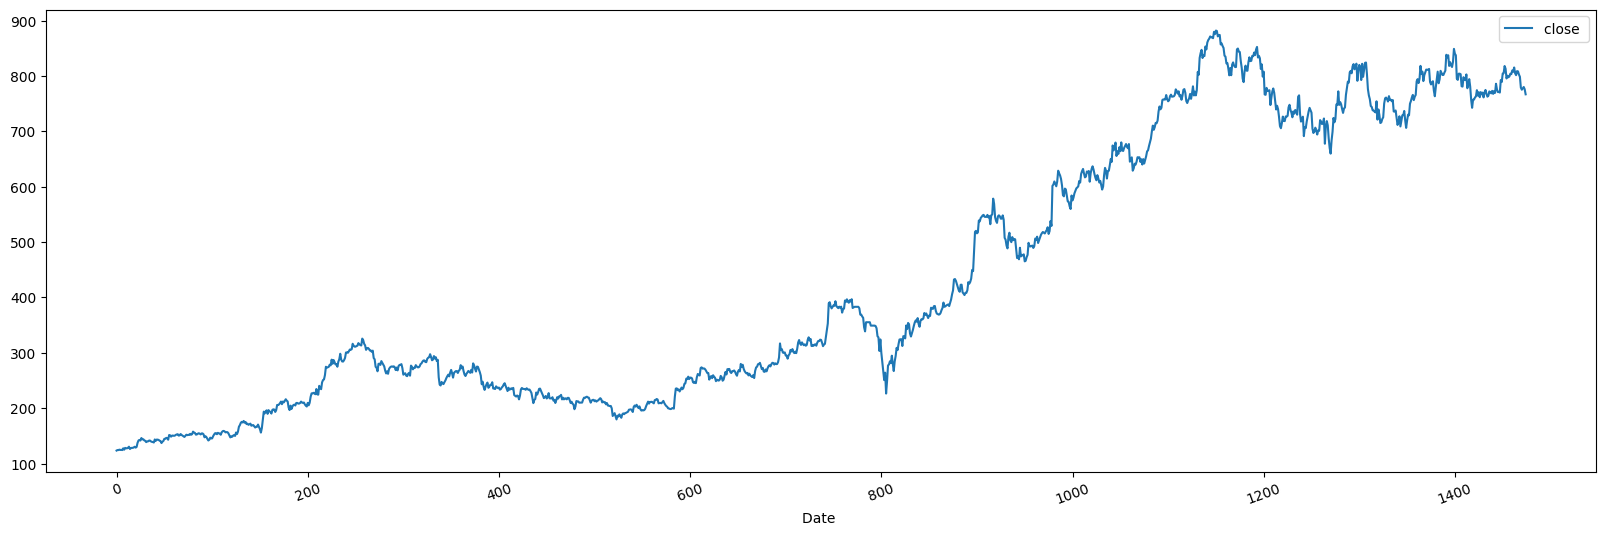

In [63]:

df['Date ']=df.index
%matplotlib inline
df.plot(x='Date ', y='close ', kind='line', figsize=(20,6), rot=20)

In [64]:

FullData=df[['close ']].values
print(FullData[0:5])

# Feature Scaling for fast training of neural networks
from sklearn.preprocessing import StandardScaler, MinMaxScaler


sc=MinMaxScaler()

DataScaler = sc.fit(FullData)
X=DataScaler.transform(FullData)


print('### After Normalization ###')
X[0:5]

[[123.55]
 [124.45]
 [124.45]
 [125.2 ]
 [124.65]]
### After Normalization ###


array([[0.        ],
       [0.00118647],
       [0.00118647],
       [0.0021752 ],
       [0.00145014]])

In [65]:

X_samples = list()
y_samples = list()

NumerOfRows = len(X)
TimeSteps=10  # next day's Price Prediction is based on last how many past day's prices

for i in range(TimeSteps , NumerOfRows , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i]
    X_samples.append(x_sample)
    y_samples.append(y_sample)

################################################
# Reshape the Input as a 3D (number of samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('\n#### Input Data shape ####')
print(X_data.shape)

# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
y_data=y_data.reshape(y_data.shape[0], 1)
print('\n#### Output Data shape ####')
print(y_data.shape)


#### Input Data shape ####
(1465, 10, 1)

#### Output Data shape ####
(1465, 1)


In [66]:
# Choosing the number of testing data records
TestingRecords=5

# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]

############################################


print('\n#### Training Data shape ####')
print(X_train.shape)
print(y_train.shape)
print('\n#### Testing Data shape ####')
print(X_test.shape)
print(y_test.shape)


#### Training Data shape ####
(1460, 10, 1)
(1460, 1)

#### Testing Data shape ####
(5, 10, 1)
(5, 1)


In [67]:
# Visualizing the input and output being sent to the LSTM model
for inp, out in zip(X_train[0:2], y_train[0:2]):
    print(inp,'--', out)

[[0.        ]
 [0.00118647]
 [0.00118647]
 [0.0021752 ]
 [0.00145014]
 [0.00158197]
 [0.00118647]
 [0.00527322]
 [0.00210929]
 [0.00632786]] -- [0.00540505]
[[0.00118647]
 [0.00118647]
 [0.0021752 ]
 [0.00145014]
 [0.00158197]
 [0.00118647]
 [0.00527322]
 [0.00210929]
 [0.00632786]
 [0.00540505]] -- [0.00533913]


In [68]:
# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 10
Number of Features: 1


In [69]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

# Adding the Second Second hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

# Adding the Second Third hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

##################################################

import time
# Measuring the time taken by the model to train
StartTime=time.time()

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

EndTime=time.time()
print("## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ##')

Epoch 1/100
292/292 [==============================] - 7s 9ms/step - loss: 0.0423
Epoch 2/100
292/292 [==============================] - 4s 15ms/step - loss: 0.0010
Epoch 3/100
292/292 [==============================] - 6s 22ms/step - loss: 8.4789e-04
Epoch 4/100
292/292 [==============================] - 5s 16ms/step - loss: 8.8900e-04
Epoch 5/100
292/292 [==============================] - 4s 15ms/step - loss: 8.5445e-04
Epoch 6/100
292/292 [==============================] - 6s 21ms/step - loss: 8.0847e-04
Epoch 7/100
292/292 [==============================] - 3s 10ms/step - loss: 7.8338e-04
Epoch 8/100
292/292 [==============================] - 2s 8ms/step - loss: 8.1449e-04
Epoch 9/100
292/292 [==============================] - 2s 8ms/step - loss: 7.8701e-04
Epoch 10/100
292/292 [==============================] - 4s 12ms/step - loss: 7.4701e-04
Epoch 11/100
292/292 [==============================] - 2s 8ms/step - loss: 7.6670e-04
Epoch 12/100
292/292 [==============================]

1/1 [==============================] - 0s 417ms/step
Accuracy: 99.29435369385307


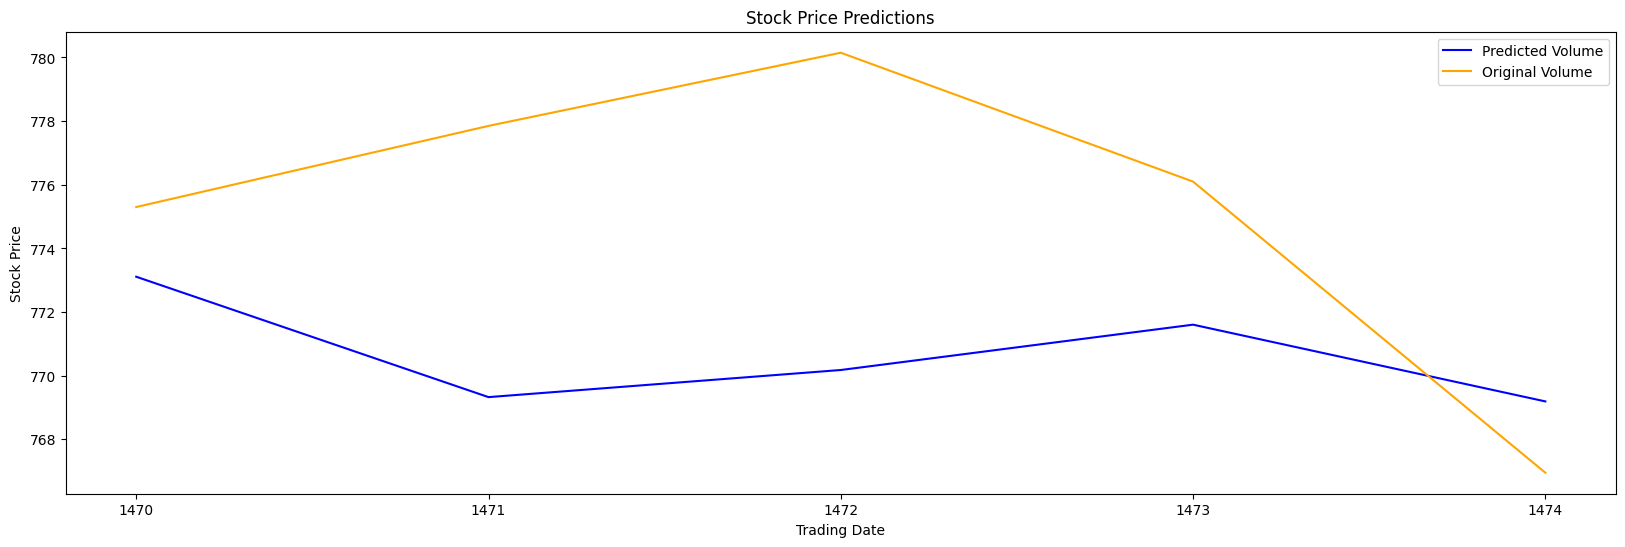

In [70]:
# Making predictions on test data
predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)

# Getting the original price values for testing data
orig=y_test
orig=DataScaler.inverse_transform(y_test)

# Accuracy of the predictions
print('Accuracy:', 100 - (100*(abs(orig-predicted_Price)/orig)).mean())

# Visualising the results
import matplotlib.pyplot as plt

plt.plot(predicted_Price, color = 'blue', label = 'Predicted Volume')
plt.plot(orig, color = 'Orange', label = 'Original Volume')

plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.xticks(range(TestingRecords), df.tail(TestingRecords)['Date '])
plt.ylabel('Stock Price')

plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

1/1 [==============================] - 0s 22ms/step


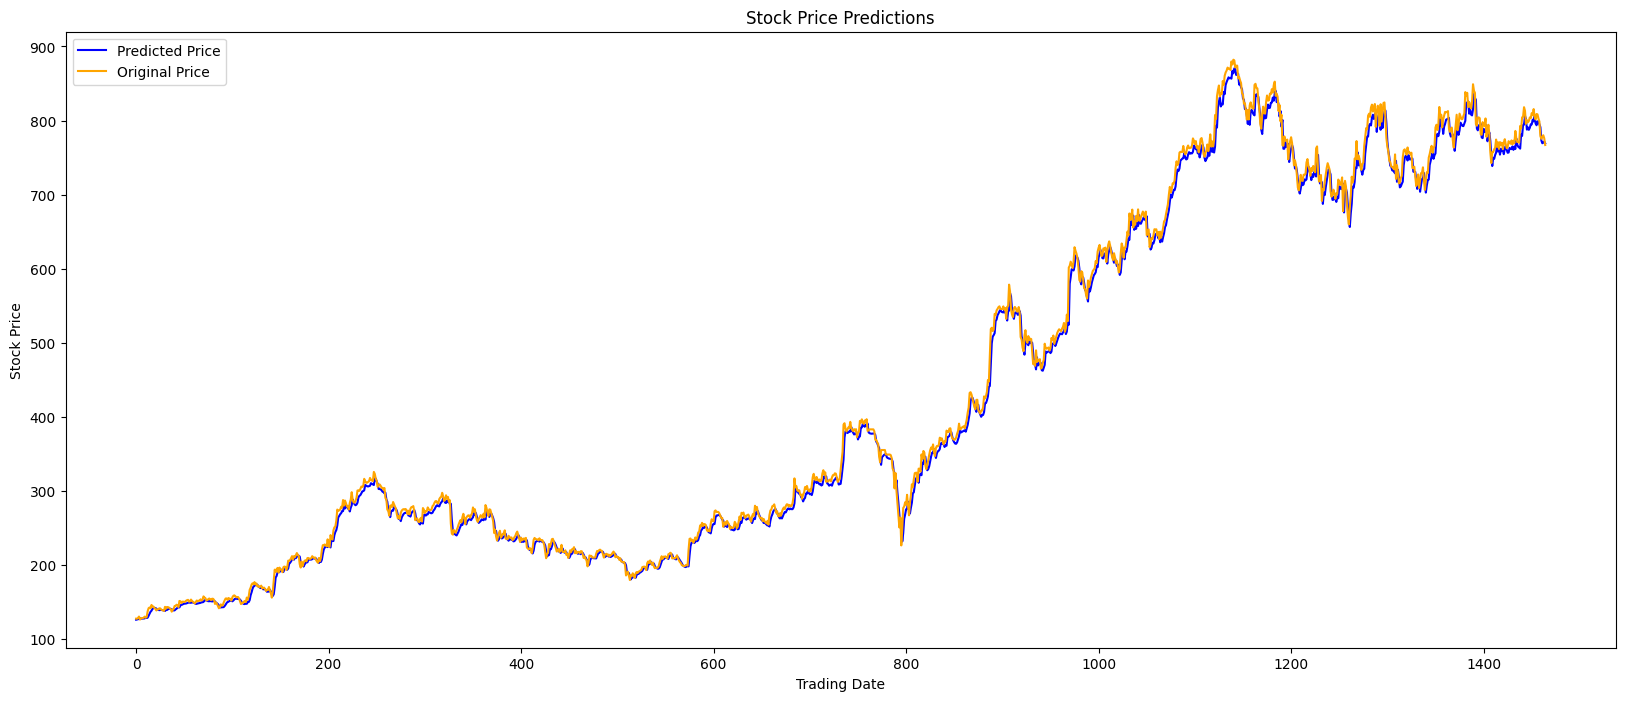

In [71]:
# Generating predictions on full data
TrainPredictions=DataScaler.inverse_transform(regressor.predict(X_train))
TestPredictions=DataScaler.inverse_transform(regressor.predict(X_test))

FullDataPredictions=np.append(TrainPredictions, TestPredictions)
FullDataOrig=FullData[TimeSteps:]

# plotting the full data
plt.plot(FullDataPredictions, color = 'blue', label = 'Predicted Price')
plt.plot(FullDataOrig , color = 'orange', label = 'Original Price')


plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.ylabel('Stock Price')
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(8)
plt.show()

In [72]:

Last10Days=np.array([808.85,808.3,802.6,798.65,779,775.3,777.85,780.15,776.1,766.95])

# Normalizing the data 
Last10Days=DataScaler.transform(Last10Days.reshape(-1,1))

# Changing the shape of the data to 3D
# Choosing TimeSteps as 10 because we have used the same for training
NumSamples=1
TimeSteps=10
NumFeatures=1
Last10Days=Last10Days.reshape(NumSamples,TimeSteps,NumFeatures)

#############################

# Making predictions on data
predicted_Price = regressor.predict(Last10Days)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
predicted_Price

1/1 [==============================] - 0s 22ms/step


array([[761.8634]], dtype=float32)

In [73]:

# Printing the last 10 values
print('Original Prices')
print(FullData[-10:])

print('###################')

# changing the shape of the data to one dimensional array because
# for Multi step data preparation we need to X input in this fashion
X=X.reshape(X.shape[0],)
print('Scaled Prices')
print(X[-10:])

Original Prices
[[808.85]
 [808.3 ]
 [802.6 ]
 [798.65]
 [779.  ]
 [775.3 ]
 [777.85]
 [780.15]
 [776.1 ]
 [766.95]]
###################
Scaled Prices
[0.90343418 0.90270912 0.89519478 0.88998748 0.86408279 0.85920506
 0.86256674 0.86559884 0.86025971 0.84819722]


In [74]:
# Multi step data preparation

# split into samples
X_samples = list()
y_samples = list()

NumerOfRows = len(X)
TimeSteps=10  # next few day's Price Prediction is based on last how many past day's prices
FutureTimeSteps=5 # How many days in future you want to predict the prices

# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows-FutureTimeSteps , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i:i+FutureTimeSteps]
    X_samples.append(x_sample)
    y_samples.append(y_sample)

################################################

# Reshape the Input as a 3D (samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('### Input Data Shape ###') 
print(X_data.shape)

# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
print('### Output Data Shape ###') 
print(y_data.shape)

### Input Data Shape ###
(1460, 10, 1)
### Output Data Shape ###
(1460, 5)


In [75]:
# Choosing the number of testing data records
TestingRecords=5

# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]

#############################################

print('\n#### Training Data shape ####')
print(X_train.shape)
print(y_train.shape)

print('\n#### Testing Data shape ####')
print(X_test.shape)
print(y_test.shape)


#### Training Data shape ####
(1455, 10, 1)
(1455, 5)

#### Testing Data shape ####
(5, 10, 1)
(5, 5)


In [76]:
# Visualizing the input and output being sent to the LSTM model
# Based on last 10 days prices we are learning the next 5 days of prices
for inp, out in zip(X_train[0:2], y_train[0:2]):
    print(inp)
    print('====>')
    print(out)
    print('#'*20)

[[0.        ]
 [0.00118647]
 [0.00118647]
 [0.0021752 ]
 [0.00145014]
 [0.00158197]
 [0.00118647]
 [0.00527322]
 [0.00210929]
 [0.00632786]]
====>
[0.00540505 0.00533913 0.00672335 0.00916222 0.00375717]
####################
[[0.00118647]
 [0.00118647]
 [0.0021752 ]
 [0.00145014]
 [0.00158197]
 [0.00118647]
 [0.00527322]
 [0.00210929]
 [0.00632786]
 [0.00540505]]
====>
[0.00533913 0.00672335 0.00916222 0.00375717 0.00573463]
####################


In [77]:
# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 10
Number of Features: 1


In [78]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))


# Adding the Second hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

# Adding the Third hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))


# Adding the output layer
# Notice the number of neurons in the dense layer is now the number of future time steps 
# Based on the number of future days we want to predict
regressor.add(Dense(units = FutureTimeSteps))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

###################################################################

import time
# Measuring the time taken by the model to train
StartTime=time.time()

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/100
291/291 [==============================] - 6s 9ms/step - loss: 0.0931
Epoch 2/100
291/291 [==============================] - 4s 12ms/step - loss: 0.0023
Epoch 3/100
291/291 [==============================] - 2s 8ms/step - loss: 0.0013
Epoch 4/100
291/291 [==============================] - 2s 8ms/step - loss: 0.0012
Epoch 5/100
291/291 [==============================] - 2s 8ms/step - loss: 0.0011
Epoch 6/100
291/291 [==============================] - 3s 9ms/step - loss: 0.0012
Epoch 7/100
291/291 [==============================] - 3s 11ms/step - loss: 0.0012
Epoch 8/100
291/291 [==============================] - 2s 8ms/step - loss: 0.0013
Epoch 9/100
291/291 [==============================] - 2s 8ms/step - loss: 0.0011
Epoch 10/100
291/291 [==============================] - 2s 8ms/step - loss: 0.0011
Epoch 11/100
291/291 [==============================] - 3s 10ms/step - loss: 0.0011
Epoch 12/100
291/291 [==============================] - 3s 11ms/step - loss: 0.0011
Epoch 13/

In [79]:
# Making predictions on test data
predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
print('#### Predicted Prices ####')
print(predicted_Price)

# Getting the original price values for testing data
orig=y_test
orig=DataScaler.inverse_transform(y_test)
print('\n#### Original Prices ####')
print(orig)

1/1 [==============================] - 0s 419ms/step
#### Predicted Prices ####
[[799.13916 799.70404 796.8581  798.1486  797.5927 ]
 [806.0492  806.7822  805.49756 806.38336 806.52515]
 [806.1822  807.33044 803.7738  804.9362  805.008  ]
 [800.62866 801.1133  797.6072  798.9925  798.7397 ]
 [796.8099  796.57324 794.3259  795.7099  795.4127 ]]

#### Original Prices ####
[[808.85 808.3  802.6  798.65 779.  ]
 [808.3  802.6  798.65 779.   775.3 ]
 [802.6  798.65 779.   775.3  777.85]
 [798.65 779.   775.3  777.85 780.15]
 [779.   775.3  777.85 780.15 776.1 ]]


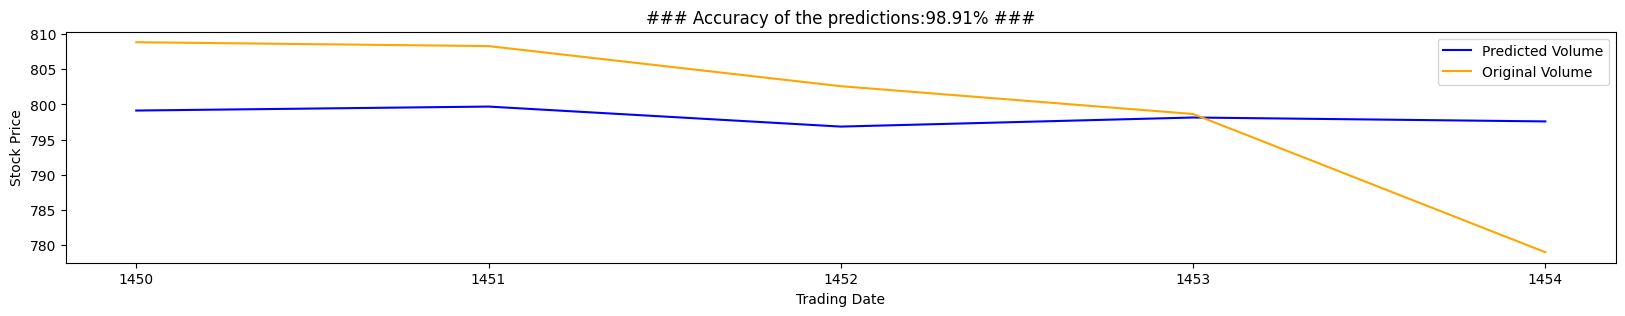

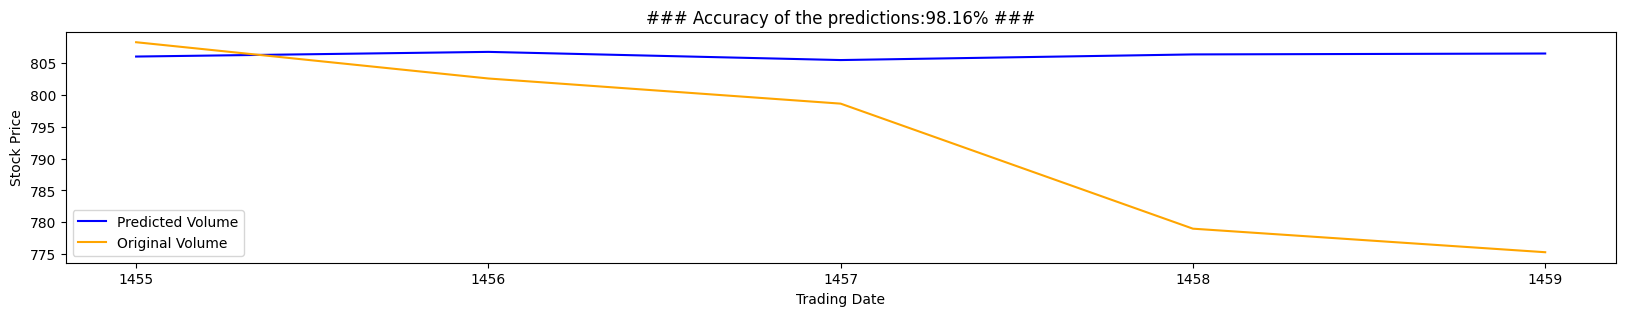

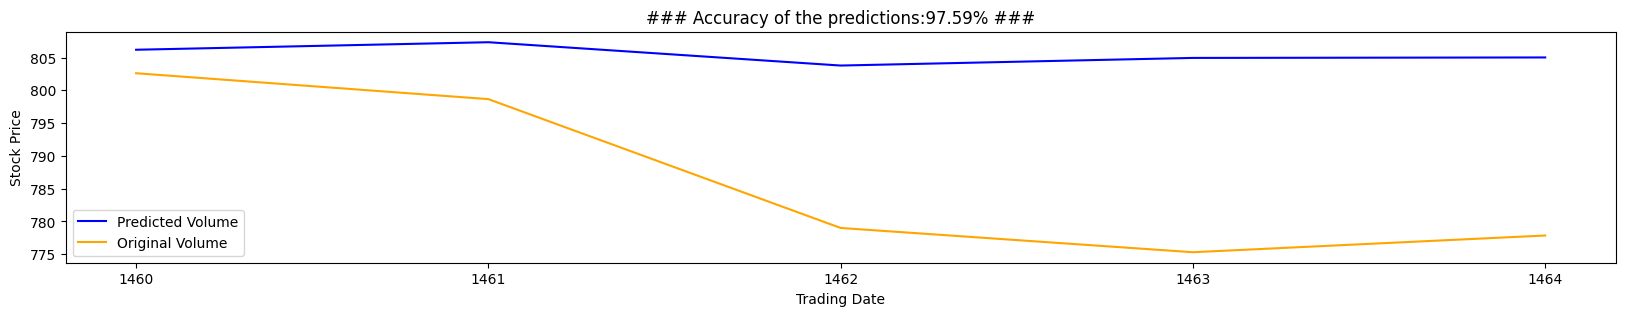

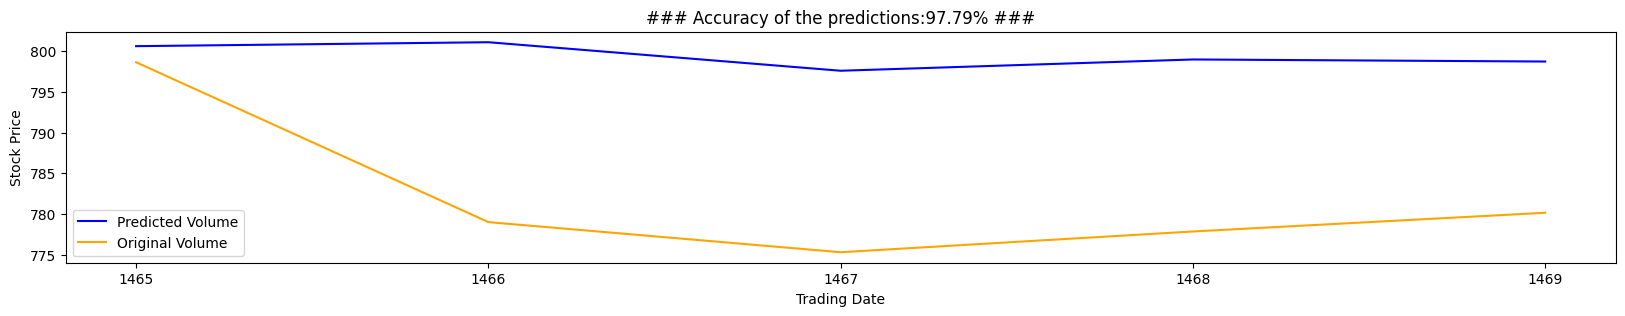

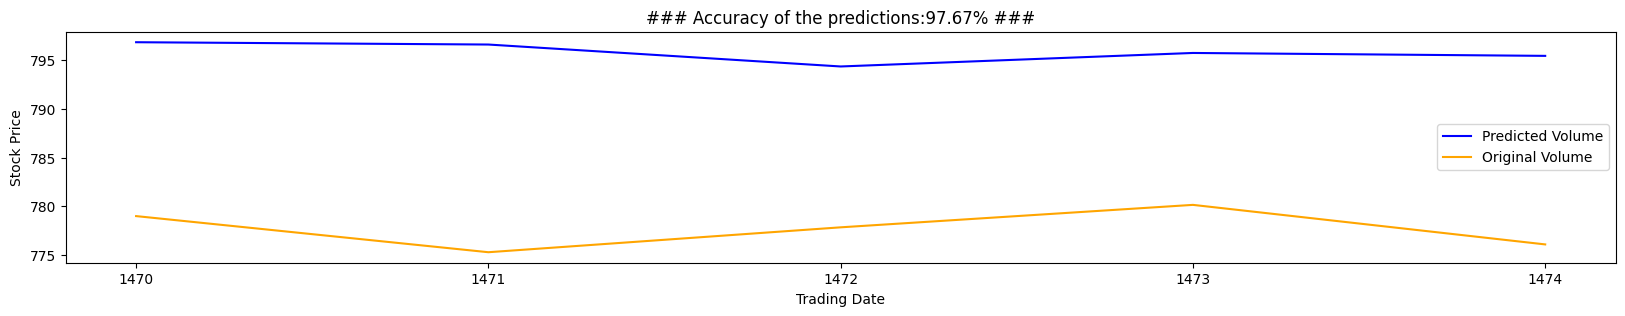

In [80]:
import matplotlib.pyplot as plt

for i in range(len(orig)):
    Prediction=predicted_Price[i]
    Original=orig[i]
    
    # Visualising the results
    plt.plot(Prediction, color = 'blue', label = 'Predicted Volume')
    plt.plot(Original, color = 'orange', label = 'Original Volume')

    plt.title('### Accuracy of the predictions:'+ str(100 - (100*(abs(Original-Prediction)/Original)).mean().round(2))+'% ###')
    plt.xlabel('Trading Date')
    
    startDateIndex=(FutureTimeSteps*TestingRecords)-FutureTimeSteps*(i+1)
    endDateIndex=(FutureTimeSteps*TestingRecords)-FutureTimeSteps*(i+1) + FutureTimeSteps
    TotalRows=df.shape[0]

    plt.xticks(range(FutureTimeSteps), df.iloc[TotalRows-endDateIndex : TotalRows-(startDateIndex) , :]['Date '])
    plt.ylabel('Stock Price')

    plt.legend()
    fig=plt.gcf()
    fig.set_figwidth(20)
    fig.set_figheight(3)
    plt.show()

In [81]:
# Making predictions on test data
Last10DaysPrices=np.array([808.85,808.3,802.6,798.65,779,775.3,777.85,780.15,776.1,766.95])

# Reshaping the data to (-1,1 )because its a single entry
Last10DaysPrices=Last10DaysPrices.reshape(-1, 1)

# Scaling the data on the same level on which model was trained
X_test=DataScaler.transform(Last10DaysPrices)

NumberofSamples=1
TimeSteps=X_test.shape[0]
NumberofFeatures=X_test.shape[1]
# Reshaping the data as 3D input
X_test=X_test.reshape(NumberofSamples,TimeSteps,NumberofFeatures)

# Generating the predictions for next 5 days
Next5DaysPrice = regressor.predict(X_test)

# Generating the prices in original scale
Next5DaysPrice = DataScaler.inverse_transform(Next5DaysPrice)
Next5DaysPrice

1/1 [==============================] - 0s 32ms/step


array([[767.89386, 764.9235 , 765.36237, 767.10876, 767.2352 ]],
      dtype=float32)